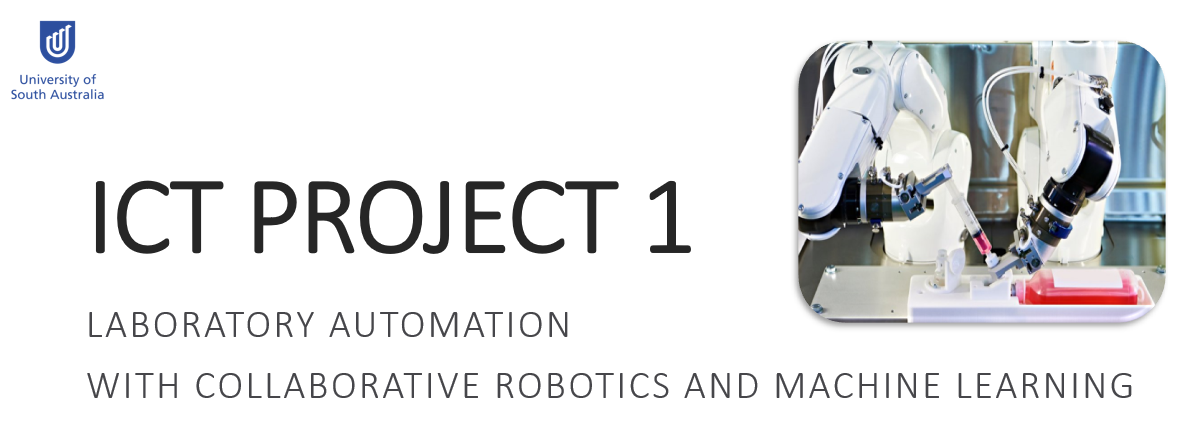

# PROJECT SPECIFICATION


##Project objective

The excessive pathological tests required for pandemic control has increase the demand for **laboratory automation** solution with higher accuracy and better 
productivity. 

SA Pathology, the industrial partner of this project, has expressed their great interests in utilising collaborative robotics to **improve the workflow** of the pathological analysis. 

This project will develop and provide a **laboratory automation solution based on collaborative robotics and computer vision** using **deep learning algorithms for object-detection, and Robot Operating System (ROS) for robotics control.** 

##Project stakeholders

*   **Industry partner**: Prof Peter O'Loughlin - SA Pathology
*   **Supervisor**: Dr Ivan Lee
*   **Project lead and developer**: An Truong

![SA Pathology](https://assets-us-01.kc-usercontent.com/db84ee95-d7c3-00c1-ee62-127dda1857f8/cf708c18-0fd6-450d-9b62-df7436c8d6b9/sa-pathology-logo.jpg?fm=png&lossless=true&w=400) 
![SA Pathology](https://pbs.twimg.com/profile_images/1366305040420380673/C5dVrQWd_400x400.jpg) 

##Project background




In laboratory environment, **accuracy is fundamental** in every aspects. Every process has to be operated precisely with the **observational error up to only 1%(in range of 99 - 101%)**. To ensure the reliability of the measurement, pipette is utilised to precisely measure and transfer the desirable amount of liquid volume.

However, there are many factors , such as the instability of ***temperature, atmospheric pressure, humidity, device failure or even human errors***, could possibly affect the precision of the measurement and calculation. 

**Pipette calibration** is the technique to validate the **correctness of the pipette performance**, by evaluating whether the error is within the acceptable range or not.

![Roboflow Notebooks](https://raw.githubusercontent.com/jeremyseto/bio-oer/master/figures/molecular/pipetting/pipetting_sequence.png)

A **pipette** consists of a **tip** to interact with sample, a **volume display** and the **plunger button** to set the liquid volume.

##Procedure of pipette calibration


There are 2 stages of the pipette calibration: **taking the sample into pipette (called aspiration) and dispensing which is sample delivery**. It is required the pipette to go through a **2-stop pushing process** with different forces on the plunger button. Each process requires high accuracy and multiple repetitions.

##Approaches and goals

With the assistance of robot and machine learning, this project will **automate the whole process** of the task, with **higher accuracy, reduce human errors, more productivity, lower labour cost and create a safer work environment** (especially when dealing with complex types of pipettes or samples).

This project will ultilise **Jetson nano** to detect pipettes, and the **robot arm (myCobot 320 Pi) from Elephant Robotics** to perform the pipette calibration.



##Product description


**Jetson nano** is a **small yet powerful** computer that provide an **ideal module** for for **AI-based computer vision applications and to perform AI vision tasks like image classification, image segmentation, object detection, and more**. 

It is compatible with open-source computer vision software and machine learning libraries and easy to develop and deploy.

The robot arm itself is **well-designed and high flexibility with 6-joints, free rotation and movement within the radius of 30cm.** It also includes built-in kinematics forward and inverse solution, provide support to computer vision and object recognition with various of adapter options to interact with the objects.

##System architecture and project breakdown

As the scope of the project is large and includes **2 seperated processes**: robotics development and object detection, we will break the project schedule into 2 stages, **spread through the period of 3 months each**. 

First, we will focus on the first half of the project.

In the Object Detection stage, the system will **apply a machine learning model to a dataset and generating an output or “prediction”**, this step called "inference". The CSI camera attached on top of the Jetson nano will take the **realtime input data**, and proceed the detection to pipettes. 

##Demonstration

This Object Detection system diagram shows **how the devices communicate with each other within the system**. The ML model and training data will be processed in local device, then after finish training, continue to inference in Jetson nano and then transmit all the  information of the pipette detection and their locations to robot arm.

The **latest release in the YOLO family of architectures**, YOLOv8 is the best in the world at what it does: **real-time object detection, segmentation, and classification**. YOLOv8 has well-documented workflows, spotless code written from the ground up, the easiest models to use ever, and flexible solutions to fit every user's needs with support for all YOLO versions.

The YOLO v8 is a cutting-edge, modern model with new features to **boost performance and versatility**. It supports both the CPU and GPU and is built using PyTorch (instead of darknet).

One key aspect of YOLOv8 is **its extensibility**, as it is designed as a framework that is compatible with all previous versions of YOLO. This allows users to **easily switch between different versions and compare their performance**, making YOLOv8 a suitable choice for those who want to take advantage of the latest YOLO technology while still utilizing their existing YOLO models.

The ML model of YOLOv8 shows **its high accuracy and efficiency in object detection, with the average accuracy 53.9%, then improve by training to reach the precision of 82.8%.**

This system is **high in flexibility and accessibility** that supports both API hosted on roboflow and local device, **depending on user preferences**.

The computer vision of the CSI camera also provides the image resolution up to 3280x2464.

##Future consideration

**Stage 1: Object Detection with Jetson nano**


*   Upgrade camera resolution for better detection
*   Improve the efficiency of the model up to 90% precision




**Stage 2: Robot control and coordination**

*   Control robot using Jetson nano via physical cable connection
*   Use air compressor to proceed the grabbing and pushing pipette (2-stop pushing)
*   Use 2 robot arms collaborate and communicate with each other to simplify the calibration procedure


# Train YOLOv8 Object Detection on a Custom Pipette Dataset

---

*Please access the resources and documentation via these links for more information*

[![Roboflow](https://raw.githubusercontent.com/roboflow-ai/notebooks/main/assets/badges/roboflow-blogpost.svg)](https://blog.roboflow.com/how-to-train-yolov8-on-a-custom-dataset)
[![YOLOv8](https://badges.aleen42.com/src/github.svg)](https://github.com/ultralytics/ultralytics) [![ProjectGit](https://badges.aleen42.com/src/github.svg)](https://github.com/UNISA-2023-SP2-07/Object-Detection)

---
Ultralytics YOLOv8 is the latest version of the YOLO (You Only Look Once) object detection and image segmentation model developed by Ultralytics. The YOLOv8 model is designed to be fast, accurate, and easy to use, making it an excellent choice for a wide range of object detection and image segmentation tasks. It can be trained on large datasets and is capable of running on a variety of hardware platforms, from CPUs to GPUs.

## Set up (before training)


*   `nvidia-smi` command: check the GPU connection
*   If something wrong => navigate: `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.
*   Create a HOME = store a content parent directory

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8

⚠️ YOLOv8 is still under heavy development. Breaking changes are being introduced almost weekly. We strive to make our YOLOv8 notebooks work with the latest version of the library. Last tests took place on **27.01.2023** with version **YOLOv8.0.20**.

YOLOv8 can be installed in two ways - from the source (git clone) and via !pip install. This is because it is the first iteration of YOLO to have an official package.

Install Ultralytics to get the YOLOv8 model

In [3]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.3/78.2 GB disk)


In [4]:
# Git clone method (for development)
# Use this to improve the model later on

# %cd {HOME}
# !git clone github.com/ultralytics/ultralytics
# %cd {HOME}/ultralytics
# !pip install -e .

# from IPython import display
# display.clear_output()

# import ultralytics
# ultralytics.checks()

In [5]:
# import needed library and YOLOv8

from ultralytics import YOLO

from IPython.display import display, Image

## CLI Basics 

###General commmand line basic

YOLO command in CLI for training and inferencing only [Ultralytics YOLO Docs](https://v8docs.ultralytics.com/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

Explanation and description for the syntax
```
yolo TASK MODE ARGS

Where   TASK (optional) is one of [detect, segment, classify, pose]
        MODE (required) is one of [train, val, predict, export, track, benchmark]
        ARGS (optional) are any number of custom 'arg=value' pairs like 'imgsz=320' that override defaults.

```

###CLI for training model

For training mode, there are parameters that need to be taken under consideration to improve the training model process.

In here, we ultilise the yolov8s.pt as it appears to be the best model with best performance and highest accuracy.

Syntax of training model
```
(main) 
yolo task=detect mode=train model=yolov8s.pt 
```
```
(more keys) 
 data= path-to-data-file 
 batch= no of samples each batch/iteration (1, totalSamplesNo), -1=auto
 epochs= no epochs to train/iteration (1,inf)
 imgsz= size of images (int)
 save= train checkpoints + predict result (bool)
 seed= random seed for reproducibility (int)
 pretrained= whether to use a pretrained model (bool)
 resume= resume training from last checkpoint (bool)
 plots= show plots during training (bool)
```

Here is an example structure of training:
```
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml batch=50 epochs=20 imgsz=640 plots=True
```

###CLI for inferencing (prediction)

Syntax of inferencing model
```
(main) 
yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt
```
```
(more keys) 
 conf= confidence rate (0,1)
 source= source of images
 augment= apply image augmentation to prediction sources (bool)
 save= predict result (bool)

```

Here is an example structure of inferencing:
```
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True
```

###CLI for model validation

*Careful tuning and experimentation with these settings are crucial to ensure optimal performance on the validation dataset and detect and prevent overfitting.*

Here is an example structure of validation:
```
!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml
```

###CLI for saving or exporting the model for use in different environments or platforms

Export a YOLOv8 model to any supported format below with the `format` argument, i.e. `format=onnx`. See [YOLOv8 Export Docs](https://docs.ultralytics.com/modes/export/) for more information.

- 💡 ProTip: Export to [ONNX](https://onnx.ai/) or [OpenVINO](https://docs.openvino.ai/latest/index.html) for up to 3x CPU speedup.  
- 💡 ProTip: Export to [TensorRT](https://developer.nvidia.com/tensorrt) for up to 5x GPU speedup.


| Format                                                                     | `format=`          | Model                     |
|----------------------------------------------------------------------------|--------------------|---------------------------|
| [PyTorch](https://pytorch.org/)                                            | -                  | `yolov8n.pt`              |
| [TorchScript](https://pytorch.org/docs/stable/jit.html)                    | `torchscript`      | `yolov8n.torchscript`     |
| [ONNX](https://onnx.ai/)                                                   | `onnx`             | `yolov8n.onnx`            |
| [OpenVINO](https://docs.openvino.ai/latest/index.html)                     | `openvino`         | `yolov8n_openvino_model/` |
| [TensorRT](https://developer.nvidia.com/tensorrt)                          | `engine`           | `yolov8n.engine`          |
| [CoreML](https://github.com/apple/coremltools)                             | `coreml`           | `yolov8n.mlmodel`         |
| [TensorFlow SavedModel](https://www.tensorflow.org/guide/saved_model)      | `saved_model`      | `yolov8n_saved_model/`    |
| [TensorFlow GraphDef](https://www.tensorflow.org/api_docs/python/tf/Graph) | `pb`               | `yolov8n.pb`              |
| [TensorFlow Lite](https://www.tensorflow.org/lite)                         | `tflite`           | `yolov8n.tflite`          |
| [TensorFlow Edge TPU](https://coral.ai/docs/edgetpu/models-intro/)         | `edgetpu`          | `yolov8n_edgetpu.tflite`  |
| [TensorFlow.js](https://www.tensorflow.org/js)                             | `tfjs`             | `yolov8n_web_model/`      |
| [PaddlePaddle](https://github.com/PaddlePaddle)                            | `paddle`           | `yolov8n_paddle_model/`   |



Export to PyTorch
```
!yolo export model=yolov8s.pt
```

### 🐍 Python SDK

Inference model using YOLOv8 directly in a Python environment (using COCO dataset)

In [ ]:
# Load a model
# model = YOLO('yolov8n.yaml')  # build a new model from scratch

In [ ]:
model = YOLO(f'{HOME}/yolov8n.pt') # load a pretrained model (recommended for training)
results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)

In [ ]:
results[0].boxes.xyxy

In [ ]:
results[0].boxes.conf

In [ ]:
results[0].boxes.cls

## Roboflow Universe

Need data for your project? Before spending time on annotating, check out Roboflow Universe, a repository of more than 110,000 open-source datasets that you can use in your projects. You'll find datasets containing everything from annotated cracks in concrete to plant images with disease annotations.



## Preparing a custom dataset




**STEP TO STEP**
### Step 1: Creating project

<div align="center">
  <img
    width="640"
    src="https://ik.imagekit.io/roboflow/preparing-custom-dataset-example/creating-project.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1672929799852"
  >
</div>

### Step 2: Uploading images

<div align="center">
  <img
    width="640"
    src="https://ik.imagekit.io/roboflow/preparing-custom-dataset-example/uploading-images.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1672929808290"
  >
</div>

### Step 3: Labeling

If you only have images, you can label them in [Roboflow Annotate](https://docs.roboflow.com/annotate).

<div align="center">
  <img
    width="640"
    src="https://user-images.githubusercontent.com/26109316/210901980-04861efd-dfc0-4a01-9373-13a36b5e1df4.gif"
  >
</div>

### Step 4: Generate new dataset version

When Generating a Version, you may elect to add preprocessing and augmentations. This step is completely optional, however, it can allow you to significantly improve the robustness of your model.

<div align="center">
  <img
    width="640"
    src="https://media.roboflow.com/preparing-custom-dataset-example/generate-new-version.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1673003597834"
  >
</div>

### Step 5: Exporting dataset

Once the dataset version is generated, we have a hosted dataset we can load directly into our notebook for easy training. Click `Export` and select the `YOLO v8 PyTorch` dataset format to get the dataset for the model in Jupyter Notebook.

<div align="center">
  <img
    width="640"
    src="https://ik.imagekit.io/roboflow/preparing-custom-dataset-example/export.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1672943313709"
  >
</div>

Feeding prepared dataset into the model of YOLOv8

In [6]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="D1r3hyiOBsbn1cCkuDwd")
project = rf.workspace("pipette-detection").project("pipettes-detection")
dataset = project.version(11).download("yolov8")





/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 8.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.0 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...

Extracting Dataset Version Zip to Pipettes-detection-11 in yolov8:: 100%|██████████| 1842/1842 [00:00<00:00, 2490.15it/s]


## Custom Training

NOTES:

The batch size is a number of samples processed before the model is updated.

The number of epochs is the number of complete passes through the training dataset.

The size of a batch must be more than or equal to one and less than or equal to the number of samples in the training dataset. 
(1<= batchSize <= noSamples)

In [7]:
%cd {HOME}

/content


As the Jupiter Notebook from Google Colab only provides limited runtime and GPU for precossing the training process (0.5 to 12hrs per training with the  cooldown period within period of 3-5 days, Maximum GPU RAM= 15.0GB and 12.7GB for System RAM), there are limited customization of data training factors like batch size, number of batchs and epochs, as it might reach the limitation of the virtual dedvice.

In general: Larger batch sizes result in faster progress in training, but don't always converge as fast. Smaller batch sizes train slower, but can converge faster. It's definitely problem dependent.

The models improve with more epochs of training, to a point. They'll start to plateau in accuracy as they converge. Try something like 50 and plot number of epochs (x axis) vs. accuracy (y axis). However, the more the number of epochs, the more likely a chance the model became overfitting. Therefore, we need to carefully identify which one is the most effective and appropriate for the model.

Here are some examination and evaluation has been done to choose the best model of all. 

The ideal combo for (batch_size, epochs) = (32, 100)

###Model examination and evaluation

**Objective of an object detection model**

**Classification**: Identify if an object is present in the image and the class of the object

**Localization**: Predict the co-ordinates of the bounding box around the object when an object is present in the image. Here we compare the co-ordinates of ground truth and predicted bounding boxes

Therefore, we need to evaluate the **performance of both classification and localization** of using bounding boxes in the image

Object detection models predict the bounding box and category of objects in an image. Intersection Over Union (IOU) is used to determine if the bounding box was correctly predicted.

The IOU indicates how much bounding boxes overlap. This ratio of overlap between the regions of two bounding boxes, ranging in between (0.0 to 1.0) as 1.0 is a perfect overlap.

And mAP50 is the accuracy when IOU=50

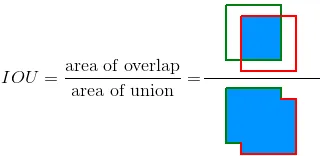

The mAP for object detection is the average of the AP calculated for all the classes. mAP@0.5 means that it is the mAP calculated at IOU threshold 0.5.

The general definition for the Average Precision(AP) is finding the area under the precision-recall curve.

The process of plotting the model's precision and recall as a function of the model’s confidence threshold is the precision recall curve.

The mAP is a good measure of the sensitivity of the neural network. **So good mAP indicates a model that's stable and consistent across difference confidence thresholds.**

On evaluation, use mAP to select best performing model (model that is more stable and consistent) out of all the trained weights across iterations/epochs. Use mAP to understand whether model should be trained/tuned further or not.

mAP@0.5 is the official VOC metric and mAP@0.5:0.95 is the official COCO metric. There is no 'best' metric, but mAP@0.5:0.95 is the most widely recognized object detection metric.

Apart from mAP, there are other evaluation metrics used for model evaluation process as well, such as: precision, recall, F1, etc.

In this project, we will focus on only **precision, recall, mAP50 and mAP50-90** to evaluate the efficiency of the model. 

In [1]:
#  Training 1
#  bigger batch and smaller epochs (50, 20)
#  model: yolov8s.pt
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml batch=50 epochs=20 imgsz=640 plots=True

/bin/bash: yolo: command not found


---

In [ ]:
#  Training 2
#  bigger batch and smaller epochs (10, 100)
#  model: yolov8s.pt
#  too many epochs may lead to overfitting (epoch in range 50 - 100 should be good)
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml batch=10 epochs=100 imgsz=640 plots=True

Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/datasets/Pipettes-detection-9/data.yaml, epochs=100, patience=50, batch=10, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=Fa

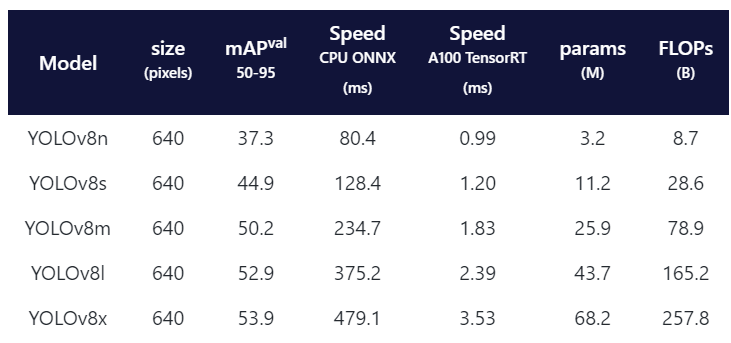

YOLOv8x has the highest average mAP value (53.9) with the highest speed among 5 latest model of yolov8. Therefore, in the next 2 tests, we will focus on the change in bacth_size and epochs between 2 training model of YOLOv8x.pt only.

In [ ]:
#  Training 3
#  bigger batch and smaller epochs (16, 100)
#  model: yolov8x.pt
!yolo task=detect mode=train model=yolov8x.pt data={dataset.location}/data.yaml batch=16 epochs=100 imgsz=640 plots=True

100% 131M/131M [00:00<00:00, 246MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8x.yaml, data=/content/datasets/Pipettes-detection-9/data.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False,

In [ ]:
#  Training 4
#  bigger batch and smaller epochs (10, 100)
#  model: yolov8x.pt
#  yolov8x.pt - the highest mAP model - dataset ver 11
!yolo task=detect mode=train model=yolov8x.pt data={dataset.location}/data.yaml batch=10 epochs=100 imgsz=640 plots=True

100% 131M/131M [00:10<00:00, 12.8MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8x.yaml, data=/content/datasets/Pipettes-detection-11/data.yaml, epochs=100, patience=50, batch=10, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=Fals

In [8]:
#  Training 5
#  bigger batch and smaller epochs (16, 100)
#  model: yolov8x.pt
#  yolov8x.pt - the highest mAP model - dataset ver 11
!yolo task=detect mode=train model=yolov8x.pt data={dataset.location}/data.yaml batch=16 epochs=100 imgsz=640 plots=True

100% 131M/131M [00:00<00:00, 159MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8x.yaml, data=/content/datasets/Pipettes-detection-11/data.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False

###Summary of training result

1. Training 1: 

  (batch_size, epochs) = (50, 20) 

  model= yolov8s.pt

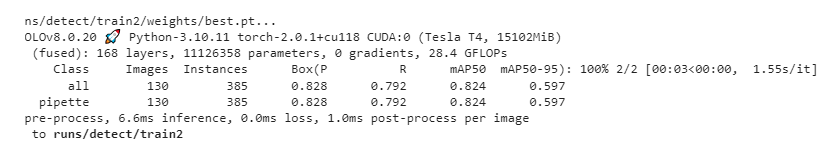



2. Training 2: 

  (batch_size, epochs) = (10, 100) 

  model= yolov8s.pt

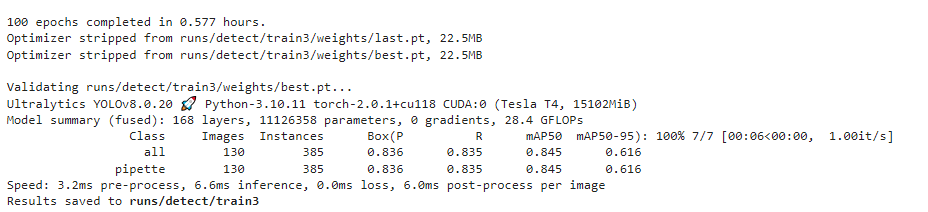

3. Training 3: 

  (batch_size, epochs) = (16, 100) 

  model= yolov8x.pt

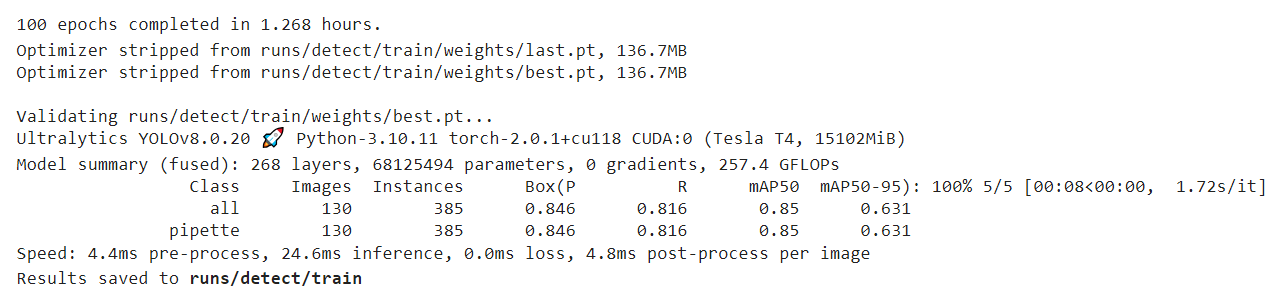

4. Training 4: 

  (batch_size, epochs) = (10, 100) 

  model= yolov8x.pt

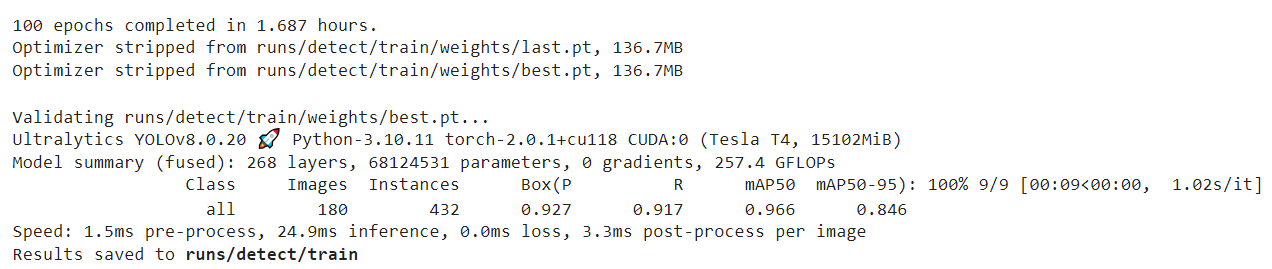

Compare 4 models with each other according to R, mAP50, mAP50-90, Precision and Recall

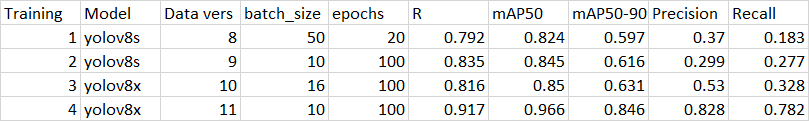

**RESULT:**

As you can see from the result, there are some feedback for the model:


+ More than one class have been labelled in the dataset (classified by 'all' and 'pipette') while the idea of the dataset and training is for feeding data with 'pipette' label only (have been fixed in the last model)

+ Each took an average of 1hr to execute the training

+ The last one is a result of modifying the dataset and model training to improve the performance

NOTES:

Every of each model training tested in here has different dataset which have been modified to provide better training performance.

There are 11 versions have been created, the latest one ([vers 11 in roboflow](https://universe.roboflow.com/pipette-detection/pipettes-detection)) is the most ideal dataset:

+ Meet the requirement of the dataset size: ~1,000 images have been generated or collected from the online resources, all have been manually annotated.

+ The distribution of the dataset is in an ideal ratio: 70:20:10 for train:val:test correspondingly

+ Diverse types, orientation, augmentation, angles, rotation: made use of the given sample pipette

+ Comparable with images, videos with different resolutions and data file types

+ Bounding box of annotations are precise to a pixel to just surround the target object only

+ To increase the efficiency and differentiate the target and the background, this dataset also includes set of backgrounds that helps lower the FP when the model trying to classify and predict the background as a target. 

In [9]:
!ls {HOME}/runs/detect/train/

args.yaml					     train_batch2.jpg
confusion_matrix.png				     train_batch3690.jpg
events.out.tfevents.1686480057.9af28ade53cf.11261.0  train_batch3691.jpg
F1_curve.png					     train_batch3692.jpg
P_curve.png					     val_batch0_labels.jpg
PR_curve.png					     val_batch0_pred.jpg
R_curve.png					     val_batch1_labels.jpg
results.csv					     val_batch1_pred.jpg
results.png					     val_batch2_labels.jpg
train_batch0.jpg				     val_batch2_pred.jpg
train_batch1.jpg				     weights


Model evaluation for the best training model

/content


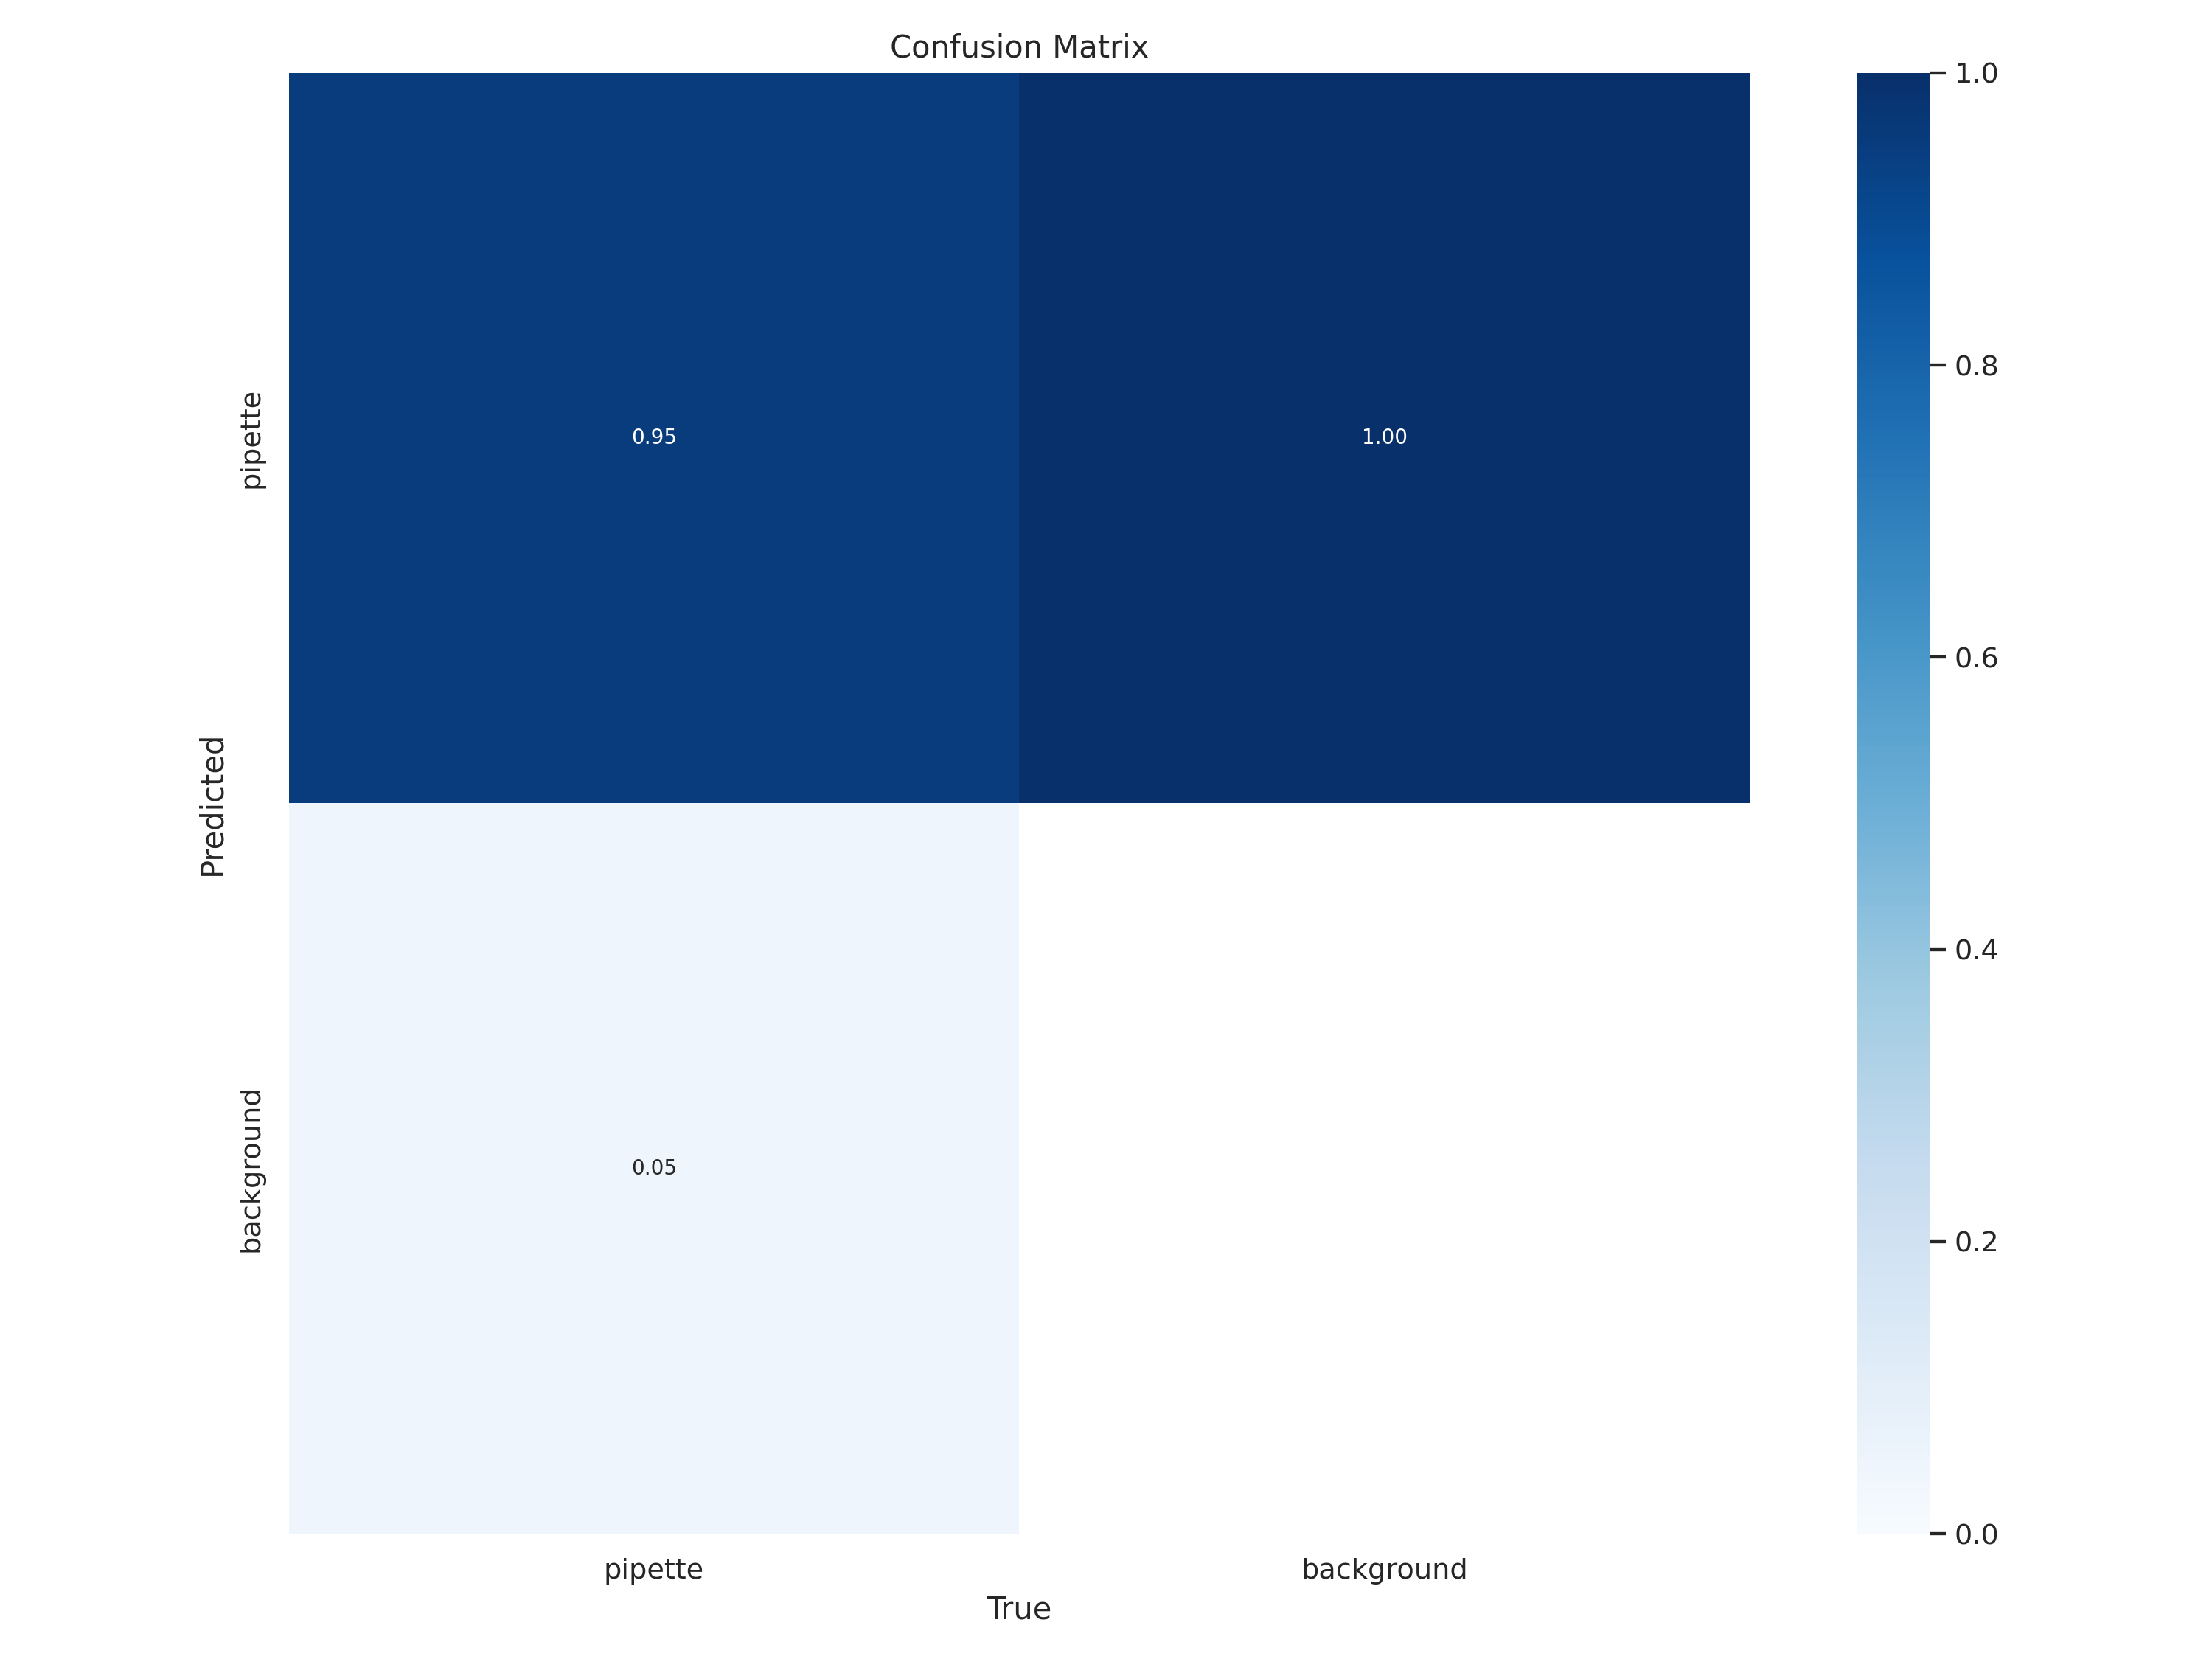

In [10]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


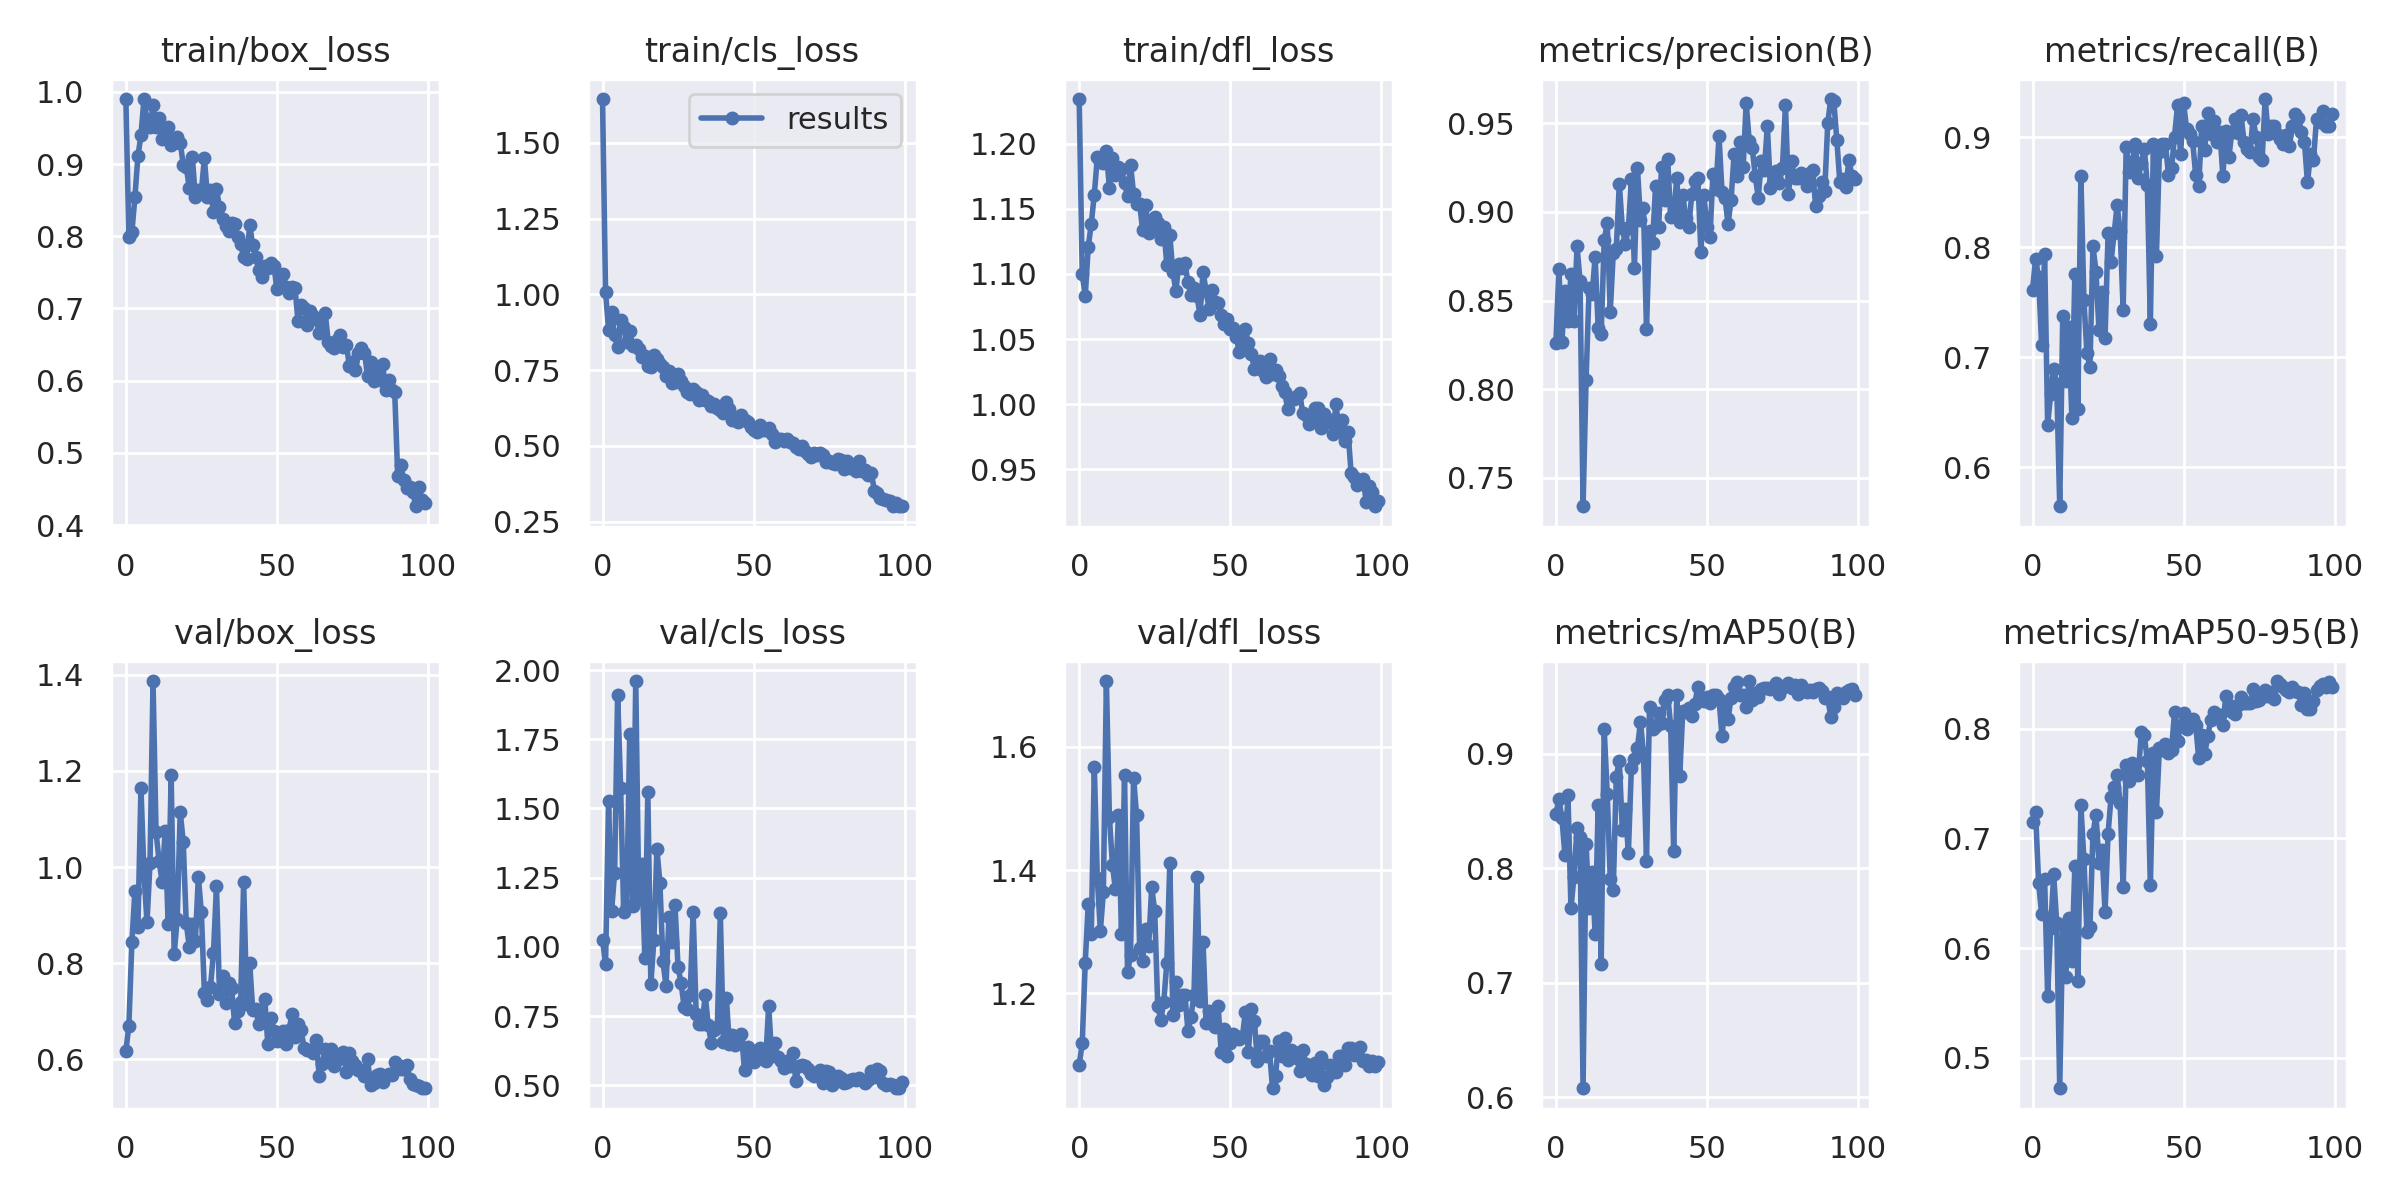

In [11]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

Here are some results for the model validation

/content


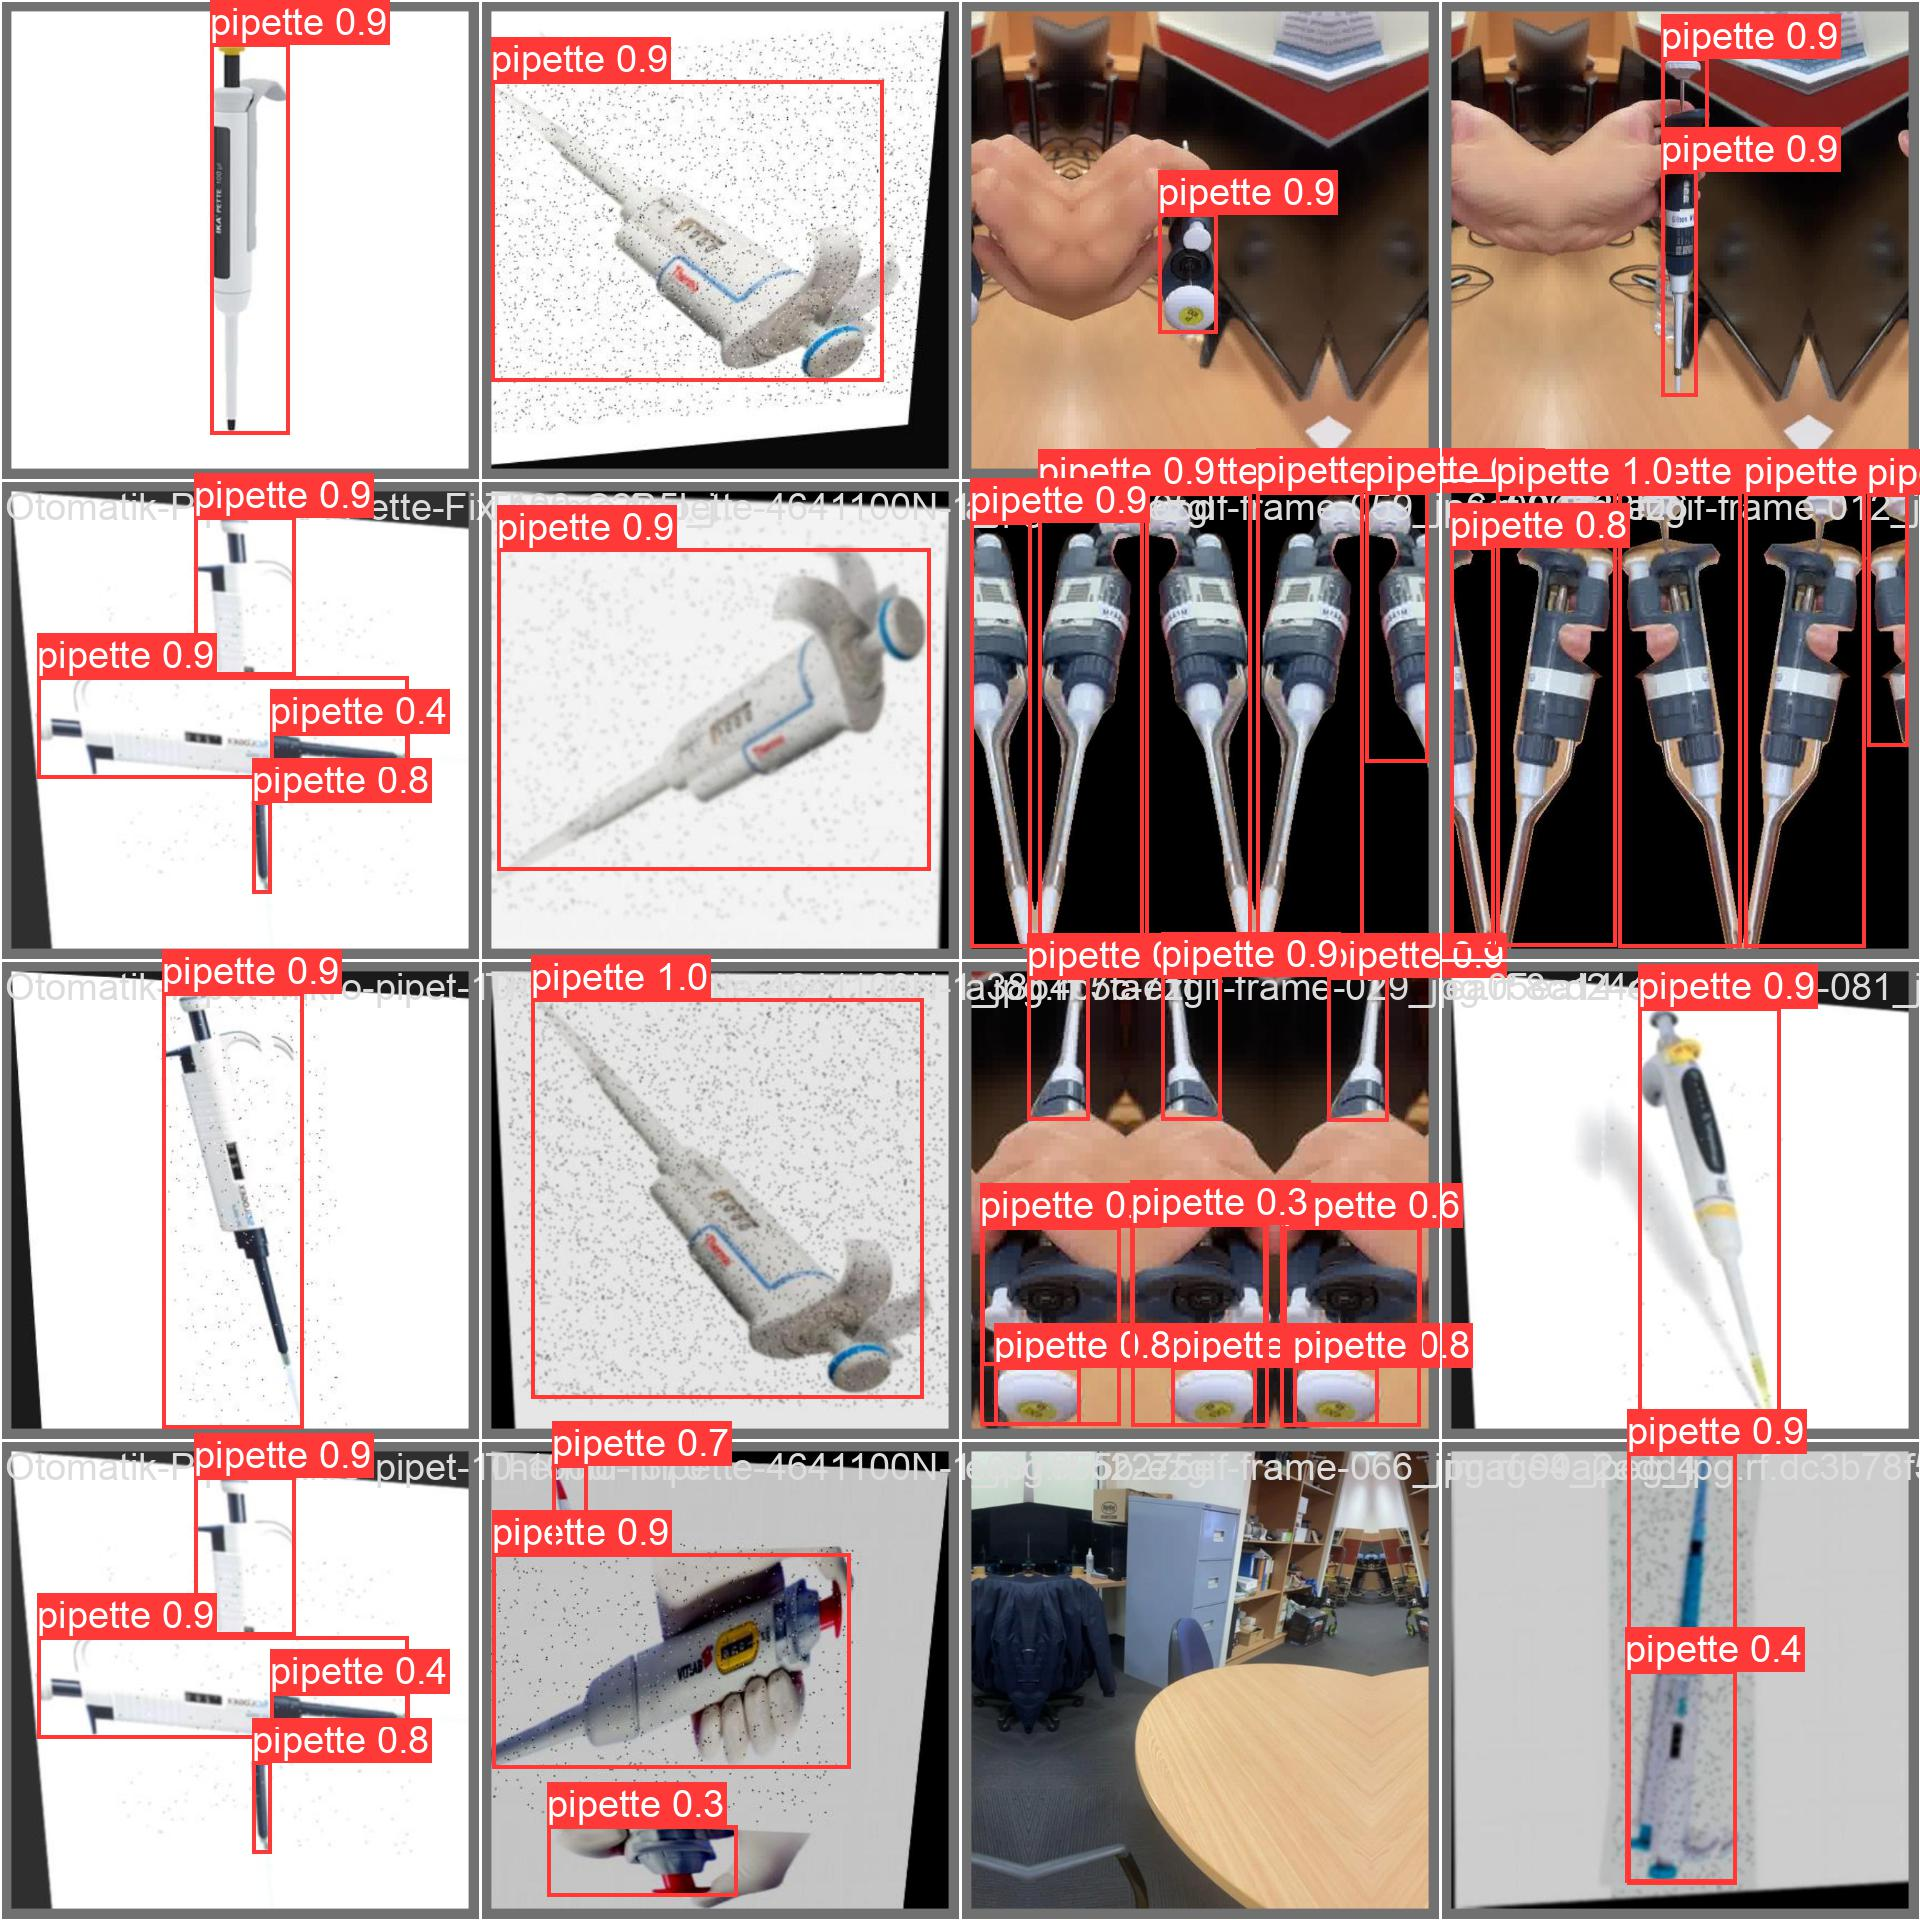

In [12]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch1_pred.jpg', width=600)

## Validate Custom Model

Validate the model and get the best trained model

In [13]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
2023-06-11 12:46:39.520581: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-11 12:46:40.493704: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 68124531 parameters, 0 gradients, 257.4 GFLOPs
val: Scanning /content/datasets/Pipettes-detection-11/valid/labels.cache... 180 images, 15 backgrounds, 0 corrupt: 100% 180/180 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 12/12 [00:14<00:00,  1.22s/it]
                   all        180        432      0.922      0.903      0.959      0.843
Speed: 1.8ms pre-process, 

## Inference with Custom Model

Using the some of the images from the dataset to inference the custom model

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
2023-06-01 12:10:37.177763: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-01 12:10:38.468638: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 68124531 parameters, 0 gradients, 257.4 GFLOPs
image 1/89 /content/datasets/Pipettes-detection-11/test/images/0-1-2-5ul-otomatik-pipet-ayarlanabilir-hacim-pipeti-otomatik-ayarlanabilir-pipetler_jpg.rf.de2214bfab14a53662ff2b8c9c69db3d.jpg: 640x640 2 pipettes, 98.1ms
image 2/89 /content/datasets/Pipettes-detection-11/test/images/0429f894-ezgif-frame-034_jpg.rf.e693fcf04aa4161f666bb04363df4a56.jpg: 640x640 2 pipettes, 51.6ms
image 3

**NOTE:** Let's take a look at few results.

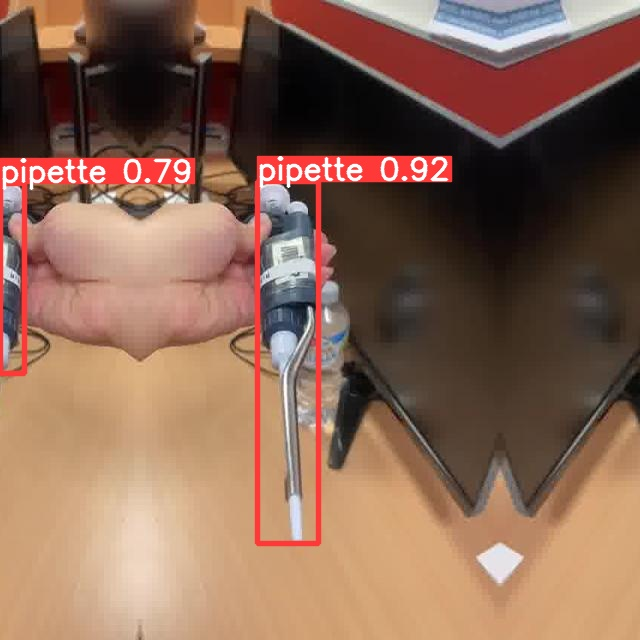

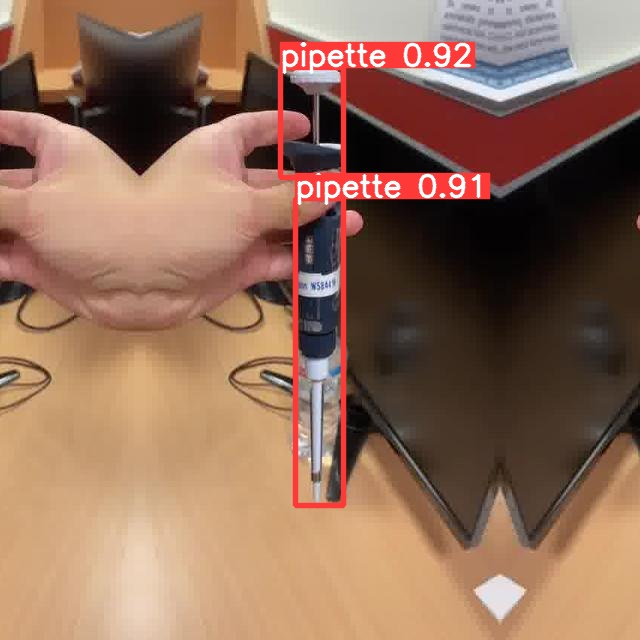

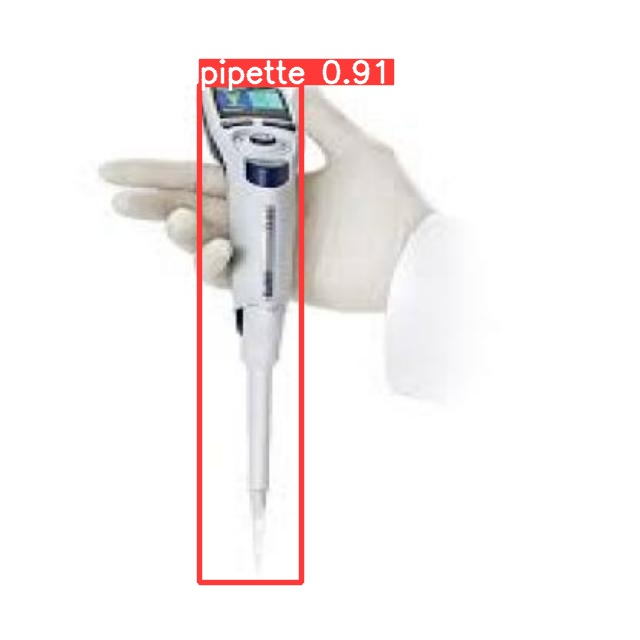

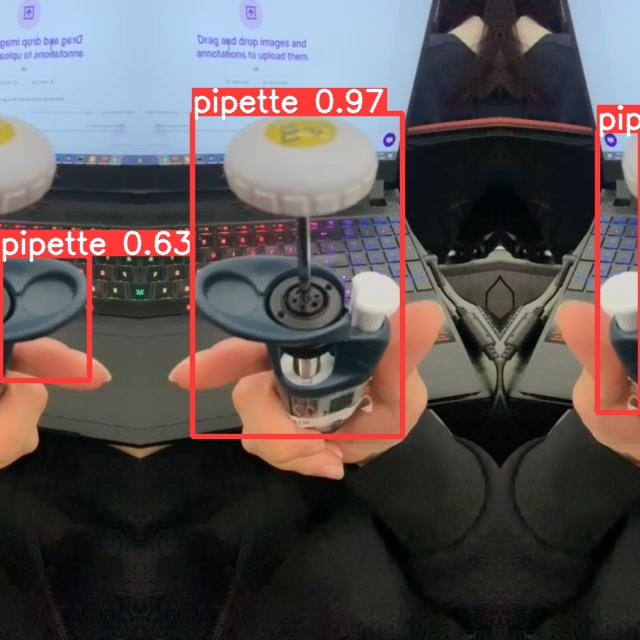

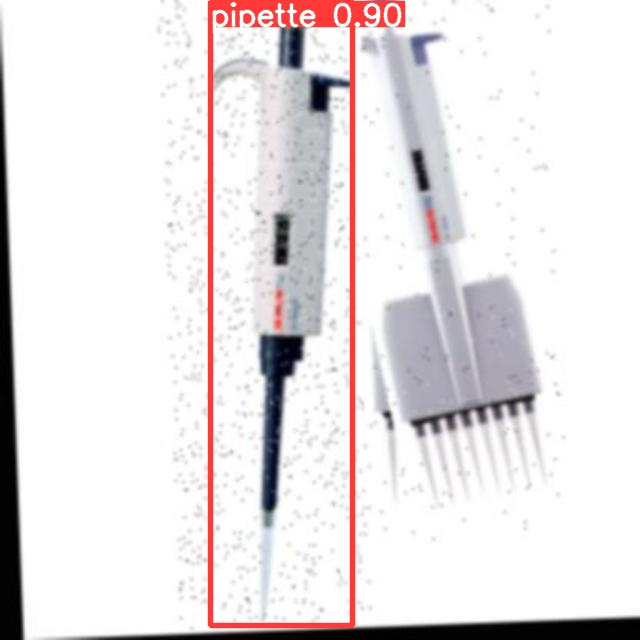

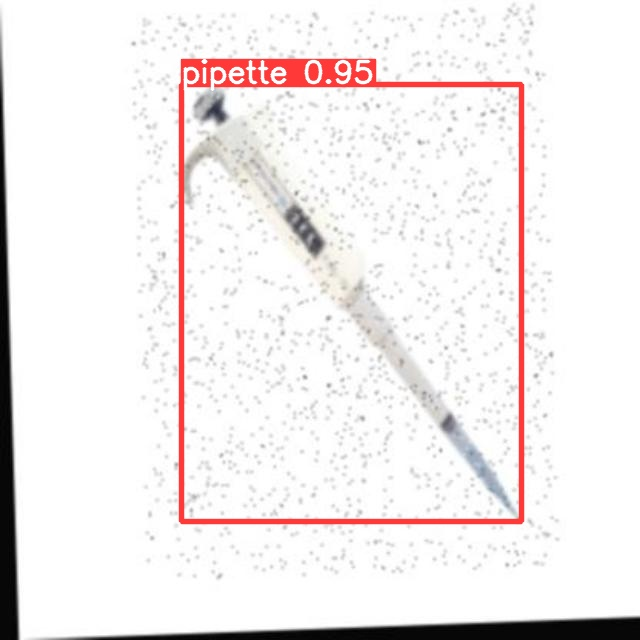

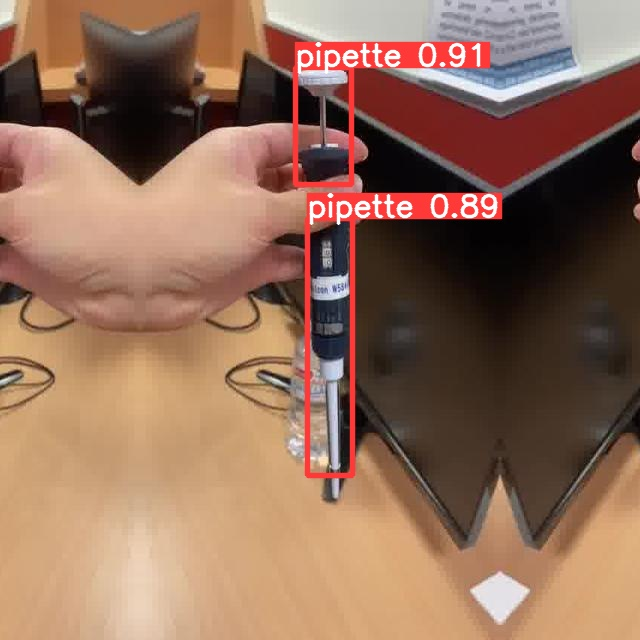

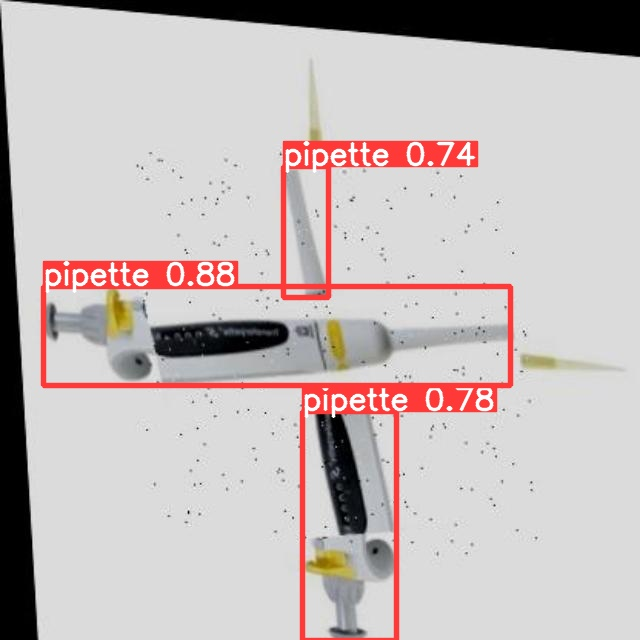

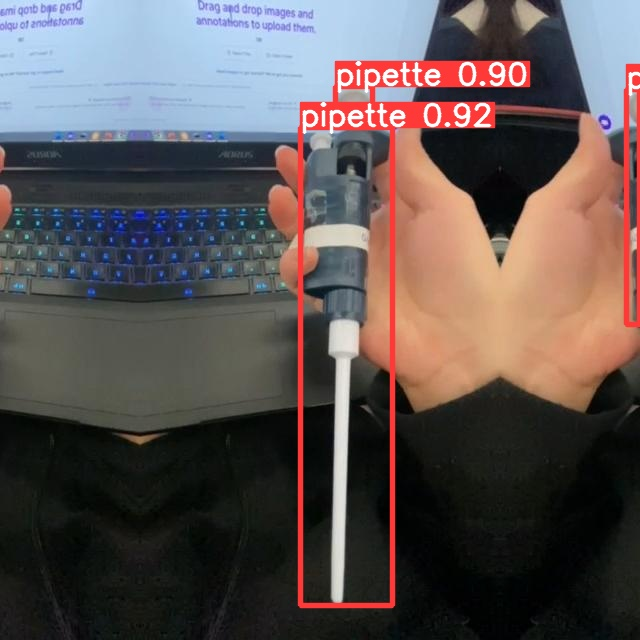

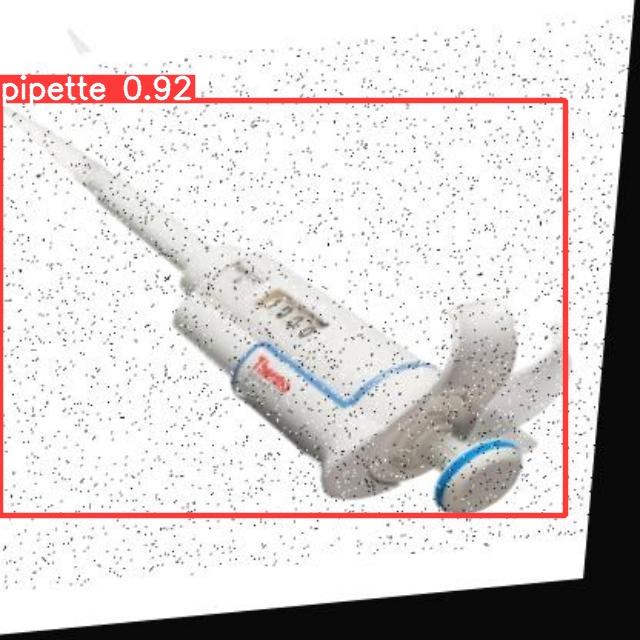

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:10]:
      display(Image(filename=image_path, width=640))
      print("\n")

## Deploy model on Roboflow

Once you have finished training your YOLOv8 model, you’ll have a set of trained weights ready for use. These weights will be in the `/runs/detect/train/weights/best.pt` folder of your project. You can upload your model weights to Roboflow Deploy to use your trained weights on our infinitely scalable infrastructure.

The `.deploy()` function in the [Roboflow pip package](https://docs.roboflow.com/python) now supports uploading YOLOv8 weights.

To upload model weights, add the following code to the “Inference with Custom Model” section in the aforementioned notebook:

In [16]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="D1r3hyiOBsbn1cCkuDwd")
project = rf.workspace("pipette-detection").project("pipettes-detection")
dataset = project.version(12).download("yolov8")


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
loading Roboflow workspace...
loading Roboflow project...

Version export complete for yolov8 format


Extracting Dataset Version Zip to Pipettes-detection-12 in yolov8:: 100%|██████████| 1196/1196 [00:00<00:00, 4141.02it/s]


In [17]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train/")

View the status of your deployment at: https://app.roboflow.com/pipette-detection/pipettes-detection/deploy/12
Share your model with the world at: https://universe.roboflow.com/pipette-detection/pipettes-detection/model/12


In [ ]:
#While your deployment is processing, checkout the deployment docs to take your model to most destinations https://docs.roboflow.com/inference

In [ ]:
#Run inference on your model on a persistant, auto-scaling, cloud API

#load model
model = project.version(dataset.version).model

#choose random test set image
import os, random
test_set_loc = dataset.location + "/test/images/"
random_test_image = random.choice(os.listdir(test_set_loc))
print("running inference on " + random_test_image)

pred = model.predict(test_set_loc + random_test_image, confidence=40, overlap=30).json()
pred

In [ ]:
ROBOFLOW_KEY=D1r3hyiOBsbn1cCkuDwdv ./infer.sh pipettes-detection/11 IMG_3203.mov fish.gif --fps_in 3 --fps_out 12 --scale 4

## References



###Learning Resources
Roboflow has produced many resources that you may find interesting as you advance your knowledge of computer vision:

- [Roboflow Notebooks](https://github.com/roboflow/notebooks): A repository of over 20 notebooks that walk through how to train custom models with a range of model types, from YOLOv7 to SegFormer.
- [Roboflow YouTube](https://www.youtube.com/c/Roboflow): Our library of videos featuring deep dives into the latest in computer vision, detailed tutorials that accompany our notebooks, and more.
- [Roboflow Discuss](https://discuss.roboflow.com/): Have a question about how to do something on Roboflow? Ask your question on our discussion forum.
- [Roboflow Models](https://roboflow.com): Learn about state-of-the-art models and their performance. Find links and tutorials to guide your learning.

### Convert data formats

Roboflow provides free utilities to convert data between dozens of popular computer vision formats. Check out [Roboflow Formats](https://roboflow.com/formats) to find tutorials on how to convert data between formats in a few clicks.

### Connect computer vision to your project logic

[Roboflow Templates](https://roboflow.com/templates) is a public gallery of code snippets that you can use to connect computer vision to your project logic. Code snippets range from sending emails after inference to measuring object distance between detections.